In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
scores = pd.read_csv('../../sites/TCGA_ATAC/ER_differential/all_sites/ER_diff_DEseq2_results.txt',sep='\t')

In [3]:
scores['neg_log2_padj'] = -np.log2(scores['padj'])

In [4]:
scores

,baseMean,log2FoldChange,lfcSE,pvalue,padj,neg_log2_padj
BRCA_10,975.613433,0.097181,0.173094,5.667328e-01,6.427615e-01,0.637644
BRCA_100,715.232074,-0.249688,0.234297,2.633755e-01,3.417974e-01,1.548787
BRCA_1000,68.191849,-1.502777,0.207070,1.201568e-13,2.419092e-12,38.588671
BRCA_10000,107.896639,-0.881604,0.153876,1.058988e-01,1.570956e-01,2.670286
BRCA_100000,90.664410,2.518774,0.373574,8.324964e-13,1.399854e-11,36.055932
...,...,...,...,...,...,...
BRCA_99995,76.941158,2.433576,0.330598,9.662200e-15,2.478561e-13,41.875562
BRCA_99996,174.863248,3.713046,0.368688,2.345407e-25,6.174919e-23,73.777926
BRCA_99997,56.816144,2.919350,0.344314,1.109164e-18,6.633976e-17,53.742904
BRCA_99998,50.672342,2.457842,0.323290,1.514054e-15,4.601171e-14,44.304992


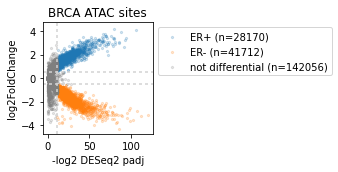

In [6]:
#global figure
fig,ax= plt.subplots(figsize = (6,2.5))

#plot a sample of the sites
sample_set = scores.sample(frac = .05, random_state =2).copy()

padj = 5*10**-4

fold_change = 0.5
fc_string = '_'.join(str(fold_change).split('.'))


ER_pos = scores[(scores['padj']<padj) & (scores['log2FoldChange']>fold_change)]
num_ER_pos = len(ER_pos)
to_plot = ER_pos[ER_pos.index.isin(sample_set.index)]
to_plot.plot.scatter(x = 'neg_log2_padj',y='log2FoldChange', alpha = 0.2, ax=ax, color='tab:blue', label = 'ER+ (n='+str(num_ER_pos)+')', s=5)
del(to_plot)


ER_neg = scores[(scores['padj']<padj) & (scores['log2FoldChange']<-fold_change)]
num_ER_neg = len(ER_neg)
to_plot = ER_neg[ER_neg.index.isin(sample_set.index)]
to_plot.plot.scatter(x = 'neg_log2_padj',y='log2FoldChange', alpha = 0.2, ax=ax, color='tab:orange', label = 'ER- (n='+str(num_ER_neg)+')', s=5)
del(to_plot)

not_differential = scores[~(scores.index.isin(ER_pos.index)) & ~(scores.index.isin(ER_neg.index))]
num_not_diff = len(scores[~(scores.index.isin(ER_pos.index)) & ~(scores.index.isin(ER_neg.index))])
to_plot = not_differential[not_differential.index.isin(sample_set.index)]
to_plot.plot.scatter(x = 'neg_log2_padj',y='log2FoldChange', alpha = 0.2, ax=ax, color='tab:grey', s=5, label = 'not differential (n='+str(num_not_diff)+')')
del(to_plot)

ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

#center around zero
ylim = ax.get_ylim()
ylim = max(abs(ylim[0]),abs(ylim[1]))
ylim = (-ylim,ylim)
ax.set_ylim(ylim)

ax.axvline(x=-np.log2(padj), color='lightgrey',dashes=(2,2))
ax.axhline(y=-fold_change, color='lightgrey',dashes=(2,2))
ax.axhline(y=fold_change, color='lightgrey',dashes=(2,2))
ax.set_title('BRCA ATAC sites')
ax.set_xlabel('-log2 DESeq2 padj')
ax.legend(bbox_to_anchor = [1,1], loc = 'upper left')
fig.tight_layout()
fig.savefig('plots/butterfly_plot.png', dpi = 300)